1. EDA on the CINIC-10 Dataset

In [38]:
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Todo:

4. pixel value distribution
5. Mean color distribution per class
3. Merge train and valid splits into 1 and perform 80-20 split
    1. Essentialy you want to take 5400 images from each class from valid and move it to test

4. Maybe RGB channel distribution
5. Maybe SSIM
6. Maybe HOG white pixels between classes

In [39]:
DATASET_DIR = './Dataset'

In [40]:
train_files = glob.glob(os.path.join(DATASET_DIR,'train/**/*.png'),recursive=True)

# Need to load the files with division

#### Distribution of datapoints per class
- Each class in each split contains 9000 images

In [41]:


classCounts = {"train":{},"test":{},"valid":{}}
dirPath = os.path.join(DATASET_DIR,'test')
for classFolder in os.listdir(dirPath):
    classCounts['test'][classFolder] = len(os.listdir(os.path.join(dirPath, classFolder)))

dirPath = os.path.join(DATASET_DIR,'train')
for classFolder in os.listdir(dirPath):
    classCounts['train'][classFolder] = len(os.listdir(os.path.join(dirPath, classFolder)))

dirPath = os.path.join(DATASET_DIR,'valid')
for classFolder in os.listdir(dirPath):
    classCounts['valid'][classFolder] = len(os.listdir(os.path.join(dirPath, classFolder)))

for splitName, splitObject in classCounts.items():
    print(f"Class distribution for {splitName}")
    for subfolder, count in splitObject.items():
        print(f"{subfolder}: {count}")


Class distribution for train
airplane: 9000
automobile: 9000
bird: 9000
cat: 9000
deer: 9000
dog: 9000
frog: 9000
horse: 9000
ship: 9000
truck: 9000
Class distribution for test
airplane: 9000
automobile: 9000
bird: 9000
cat: 9000
deer: 9000
dog: 9000
frog: 9000
horse: 9000
ship: 9000
truck: 9000
Class distribution for valid
airplane: 9000
automobile: 9000
bird: 9000
cat: 9000
deer: 9000
dog: 9000
frog: 9000
horse: 9000
ship: 9000
truck: 9000


In [44]:
def parse_filepath(filepath):
    path, filename = os.path.split(filepath)
    filename, ext = os.path.splitext(filename)
    fileSize = os.path.getsize(filepath)
    im = Image.open(filepath)
    width, height = im.size
    return int(fileSize)/1024, int(width), int(height)

In [45]:
train_files = glob.glob(os.path.join(DATASET_DIR,'train/**/*.png'),recursive=True)
attributes = list(map(parse_filepath, train_files))

In [48]:
df = pd.DataFrame(attributes)
df['file'] = train_files
df.columns = [ 'file size (KB)','width','height','file']
df = df.dropna()

All images are of 32x32 resolution, the average image size is 2.67 KB

In [49]:
df.describe()

,file size (KB),width,height
count,90000.000000,90000.0,90000.0
mean,2.670482,32.0,32.0
std,2.082283,0.0,0.0
min,0.244141,32.0,32.0
25%,2.195312,32.0,32.0
50%,2.396484,32.0,32.0
75%,2.593750,32.0,32.0
max,377.538086,32.0,32.0


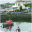

In [53]:
Image.open(df.loc[df['file size (KB)'].idxmax()]['file'])